In [ ]:
# ftp://ftp.sas.com/pub/neural/dojo/dojo.html
# stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [135]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [136]:
# load the dataset
dataset = pd.read_csv("C:/Users/Zz240/Desktop/Big Data & ML/data_cleaned.csv")
# split into input (X) and output (y) variables
train_dataset = dataset.sample(frac=0.85,random_state=2021)
test_dataset = dataset.drop(train_dataset.index)

In [137]:
train_stats = train_dataset.describe()
train_stats.pop("Price")
train_stats = train_stats.transpose()

In [138]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [139]:
del normed_train_data['Price']
normed_train_data

,Bathroom,BuildingArea,Car,Distance,Landsize,Rooms,Type1,Type2,Type3,YearBuilt
3970,0.466097,-0.356946,0.297934,4.080221,-0.919497,-0.248421,0.454215,-0.297864,-0.313584,1.064448
2832,-0.914314,-0.379604,-0.718946,-0.528944,-0.073620,0.935013,0.454215,-0.297864,-0.313584,-0.900917
1052,1.846508,1.036535,0.297934,0.239250,0.925234,0.935013,0.454215,-0.297864,-0.313584,0.553963
3951,0.466097,-0.028402,0.297934,0.489749,-0.905999,-0.248421,0.454215,-0.297864,-0.313584,1.013399
2976,1.846508,-0.141693,-0.718946,-0.528944,-0.217599,0.935013,0.454215,-0.297864,-0.313584,-1.028538
...,...,...,...,...,...,...,...,...,...,...
3517,1.846508,0.798623,0.297934,-0.495544,-0.649536,0.935013,-2.201107,-0.297864,3.188230,1.243117
5167,-0.914314,-0.617516,-0.718946,-0.211646,-1.589899,-1.431855,-2.201107,3.356483,-0.313584,-0.007569
2103,-0.914314,-0.424921,1.314813,0.623348,0.443804,-0.248421,0.454215,-0.297864,-0.313584,0.502915
1291,0.466097,-0.096376,0.297934,0.589948,0.817250,-0.248421,0.454215,-0.297864,-0.313584,0.502915


In [140]:
del normed_test_data['Price']
normed_test_data

,Bathroom,BuildingArea,Car,Distance,Landsize,Rooms,Type1,Type2,Type3,YearBuilt
2,-0.914314,0.504067,-0.718946,-0.044647,2.392020,0.935013,0.454215,-0.297864,-0.313584,-0.007569
14,0.466097,-0.164351,0.297934,5.833708,2.293034,0.935013,0.454215,-0.297864,-0.313584,0.502915
19,0.466097,0.470079,0.297934,2.009437,2.275037,2.118447,0.454215,-0.297864,-0.313584,0.375294
20,0.466097,-0.107706,-0.718946,4.096921,2.266038,-0.248421,0.454215,-0.297864,-0.313584,0.911302
29,0.466097,0.753307,0.297934,-0.111447,2.225544,2.118447,0.454215,-0.297864,-0.313584,-0.900917
...,...,...,...,...,...,...,...,...,...,...
5248,-0.914314,-1.036693,-0.718946,0.038852,-1.648390,-1.431855,0.454215,-0.297864,-0.313584,0.247673
5256,-0.914314,-0.776123,-0.718946,0.339450,-1.652890,-1.431855,-2.201107,3.356483,-0.313584,0.247673
5257,-0.914314,-0.606187,-0.718946,0.038852,-1.652890,-1.431855,0.454215,-0.297864,-0.313584,0.375294
5263,-0.914314,-0.549541,-0.718946,-0.078047,-1.657389,-1.431855,-2.201107,3.356483,-0.313584,-0.007569


In [141]:
train_labels = train_dataset.pop('Price')
test_labels = test_dataset.pop('Price')

In [142]:
train_X = normed_train_data
train_y = train_labels
test_X = normed_test_data
test_y = test_labels

model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',
optimizer=keras.optimizers.RMSprop(0.005), metrics=['mae', 'mse'])
history = model.fit(train_X, train_y, epochs=1000, batch_size=16, validation_split = 0.2)
_,_, MSE = model.evaluate(train_X, train_y)
print('RMSE: %.2f' % (np.sqrt(MSE)))

In [143]:
from sklearn.model_selection import train_test_split
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=10, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1))
# compile the keras model
model.compile(loss='mse',
                optimizer=keras.optimizers.RMSprop(0.005),
                metrics=['mae', 'mse'])
# fit the keras model on the dataset
history = model.fit(train_X, train_y, epochs=1000, batch_size=16, validation_split=0.2)

# evaluate the keras model
_,_, MSE = model.evaluate(train_X, train_y)
print('RMSE: %.2f' % (np.sqrt(MSE)))

Epoch 1/1000
224/224 [==============================] - 0s 861us/step - loss: 1822856839168.0000 - mae: 1178452.2500 - mse: 1822856839168.0000 - val_loss: 1727613239296.0000 - val_mae: 1157535.3750 - val_mse: 1727613239296.0000
Epoch 2/1000
224/224 [==============================] - 0s 498us/step - loss: 1822745427968.0000 - mae: 1178413.2500 - mse: 1822745427968.0000 - val_loss: 1727453069312.0000 - val_mae: 1157481.5000 - val_mse: 1727453069312.0000
Epoch 3/1000
224/224 [==============================] - 0s 485us/step - loss: 1822533222400.0000 - mae: 1178341.7500 - mse: 1822533222400.0000 - val_loss: 1727193808896.0000 - val_mae: 1157394.3750 - val_mse: 1727193808896.0000
Epoch 4/1000
224/224 [==============================] - 0s 496us/step - loss: 1822221664256.0000 - mae: 1178237.2500 - mse: 1822221664256.0000 - val_loss: 1726842273792.0000 - val_mae: 1157276.0000 - val_mse: 1726842273792.0000
Epoch 5/1000
224/224 [==============================] - 0s 496us/step - loss: 1821821501

In [144]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.161610e+11,322706.50000,2.161610e+11,2.455547e+11,303673.65625,2.455547e+11,995
996,2.161157e+11,322627.28125,2.161157e+11,2.455110e+11,303619.90625,2.455110e+11,996
997,2.160617e+11,322632.15625,2.160617e+11,2.455118e+11,303583.03125,2.455118e+11,997
998,2.160169e+11,322564.56250,2.160169e+11,2.454797e+11,303549.59375,2.454797e+11,998
999,2.159675e+11,322520.71875,2.159675e+11,2.454627e+11,303512.68750,2.454627e+11,999


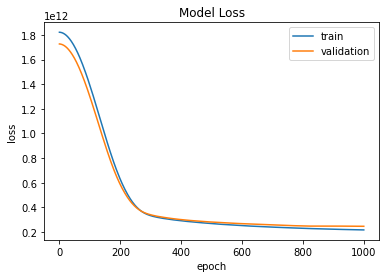

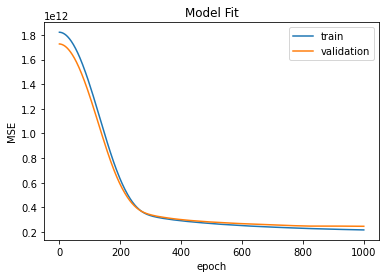

In [145]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for mse
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model Fit')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [146]:
test_predictions = model.predict(test_X)

In [147]:
np.size(test_predictions)

790

In [148]:
np.array(test_labels)[1]

521000

In [149]:
error = []
error_squared = []
for i in range(np.size(test_predictions)):
    error.append(test_predictions[i][0] - np.array(test_labels)[i])
    error_squared.append(np.square(test_predictions[i][0] - np.array(test_labels)[i]))
error_squared

[208885904380.14062,
 2776012172.015625,
 104457593601.0,
 903881676.390625,
 5789592987.890625,
 52232931297.5625,
 3074369809.0,
 35339981614.22266,
 708077440833.8906,
 129647794405.64062,
 49273344576.0,
 979327952100.0,
 24061089793.140625,
 274361463922.5625,
 149007773232.5625,
 38410634687.34766,
 731946124982.25,
 19612672047.5625,
 21552955885.5625,
 1134717120.9414062,
 81533983914.9414,
 1546701416.015625,
 8345964414.0625,
 623519627.640625,
 231446144832.25,
 411690821384.3906,
 40801222547.265625,
 466800158370.0625,
 379071097656.25,
 64111759209.0,
 349527490472.25,
 3213345110.640625,
 68245815121.0,
 26079343081.0,
 30634319458.890625,
 4636786484070.016,
 4113105822.25,
 2637476688961.0,
 22967099401.0,
 168635989072.26562,
 21703421795.660156,
 239882734173.0625,
 21359804231.253906,
 257916701025.0,
 345907189251.5625,
 301213202637.3789,
 14219697950.640625,
 439941021680.25,
 144952762983.89062,
 54965161362.25,
 321792132922.5625,
 390875821500.3906,
 131962186

In [150]:
RMSE = np.sqrt(np.sum(error_squared)/np.size(test_predictions))
RMSE

413943.452223117

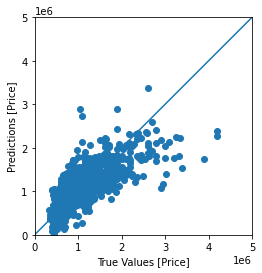

In [153]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 5e+06]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

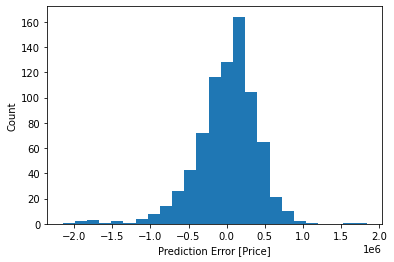

In [154]:
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")